In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import nbodykit.lab as nb
from glob import glob

In [12]:
import sys
sys.path.append('/home/mehdi/github/LSSutils')
from lssutils.dataviz import setup_color

In [13]:
setup_color()

In [4]:
p = '/home/mehdi/data/eboss/data/v7_2/3.0/catalogs_boosting/'
pk_path = lambda s, v:f'{p}eBOSS_QSO_known_{s}_{v:.1f}_NGC_v7_2.pk.json'

In [5]:
def readpk(filen):
    d = nb.ConvolvedFFTPower.load(filen)
    return (d.poles['k'], d.poles['power_0'].real-d.attrs['shotnoise'])


k_, pk_ = readpk('/home/mehdi/data/eboss/data/v7_2/3.0/measurements/spectra/spectra_NGC_known_mainhighz_512_v7_2_main.json')
k_n, pk_n = readpk('/home/mehdi/data/eboss/data/v7_2/3.0/measurements/spectra/spectra_NGC_noweight_mainhighz_512_v7_2_main.json')
k0, pk0 = readpk('/home/mehdi/data/eboss/data/v7_2/3.0/catalogs_boosting/eBOSS_QSO_known_nstar_1.0_NGC_v7_2.pk.json')

pks = {}
for syst in ['ebv', 'depthg', 'nstar', 'psfi', 'skyi']:
    for val in np.arange(2.0, 4.5, 0.5):
        pks[f'{val}x{syst}'] = readpk(pk_path(syst, val))

In [6]:
from matplotlib.backends.backend_pdf import PdfPages

In [7]:
ls /home/mehdi/data/eboss/

data/  figs/  mocks/  test/


In [8]:
pks_r = {}
pks_files = glob('/home/mehdi/data/eboss/data/v7_2/3.0/catalogs_boosting_ran/eBOSS_QSO_known_*.json')
pks_files

['/home/mehdi/data/eboss/data/v7_2/3.0/catalogs_boosting_ran/eBOSS_QSO_known_nstar_2.5_NGC_v7_2.pk.json',
 '/home/mehdi/data/eboss/data/v7_2/3.0/catalogs_boosting_ran/eBOSS_QSO_known_nstar_3.0_NGC_v7_2.pk.json',
 '/home/mehdi/data/eboss/data/v7_2/3.0/catalogs_boosting_ran/eBOSS_QSO_known_nstar_5.0_NGC_v7_2.pk.json',
 '/home/mehdi/data/eboss/data/v7_2/3.0/catalogs_boosting_ran/eBOSS_QSO_known_nstar_10.0_NGC_v7_2.pk.json',
 '/home/mehdi/data/eboss/data/v7_2/3.0/catalogs_boosting_ran/eBOSS_QSO_known_nstar_20.0_NGC_v7_2.pk.json',
 '/home/mehdi/data/eboss/data/v7_2/3.0/catalogs_boosting_ran/eBOSS_QSO_known_nstar_12.0_NGC_v7_2.pk.json',
 '/home/mehdi/data/eboss/data/v7_2/3.0/catalogs_boosting_ran/eBOSS_QSO_known_nstar_14.0_NGC_v7_2.pk.json',
 '/home/mehdi/data/eboss/data/v7_2/3.0/catalogs_boosting_ran/eBOSS_QSO_known_nstar_16.0_NGC_v7_2.pk.json',
 '/home/mehdi/data/eboss/data/v7_2/3.0/catalogs_boosting_ran/eBOSS_QSO_known_nstar_18.0_NGC_v7_2.pk.json']

In [9]:
for pks_i in pks_files:
    val = pks_i.split('/')[-1].split('_')[4]
    pks_r[val] = readpk(pks_i)

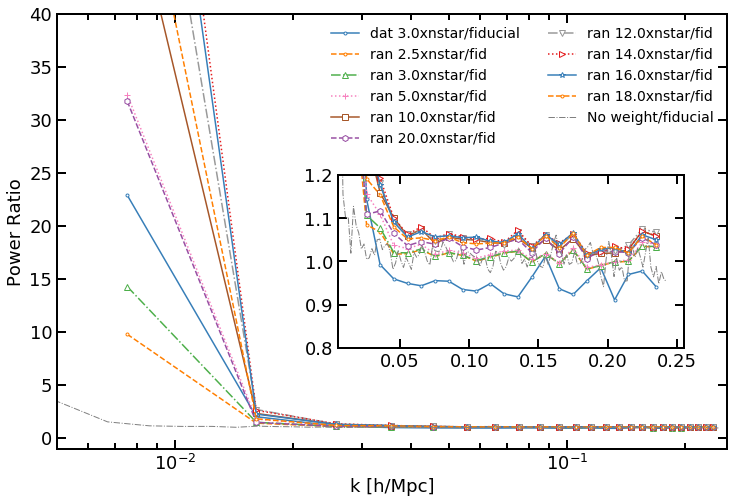

In [17]:
syst = 'nstar'
val = 3.0

fg, ax = plt.subplots(figsize=(12, 8))
ax1 = fg.add_axes([0.45, 0.3, 0.4, 0.3])

ni = f'{val}x{syst}'
pki = pks[ni]

ax.plot(pki[0], pki[1]/pk0, marker='.', mfc='w', label=f'dat {ni}/fiducial')
ax1.plot(pki[0], pki[1]/pk0, marker='.', mfc='w')


marker = 2*['.', '^', '+', 's', 'h', 'v', '>', '*']

i = 0
for pks_i,val_i in pks_r.items():
    ax.plot(val_i[0], val_i[1]/pk0, marker=marker[i], mfc='w', label=f'ran {pks_i}xnstar/fid')
    ax1.plot(val_i[0], val_i[1]/pk0, marker=marker[i], mfc='w', label=f'ran {pks_i}xnstar/fid')
    i += 1

ax.plot(k_, pk_n/pk_, color='grey', lw=1, label='No weight/fiducial')
ax1.plot(k_, pk_n/pk_, color='grey', lw=1, label='No weight/fiducial')

ax.set(xlim=(0.005, 0.255), ylim=(-1, 40.), xscale='log',
      xlabel='k [h/Mpc]', ylabel='Power Ratio')
ax.legend(ncol=2, frameon=False, fontsize=14)

ax1.set(ylim=(0.8, 1.2), xlim=(0.005, 0.255))
fg.savefig('sysboost_nstar.png', dpi=300, bbox_inches='tight')

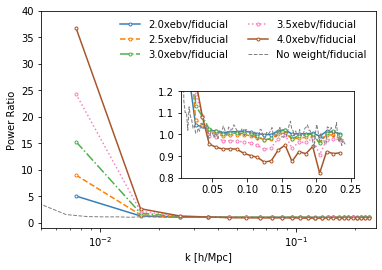

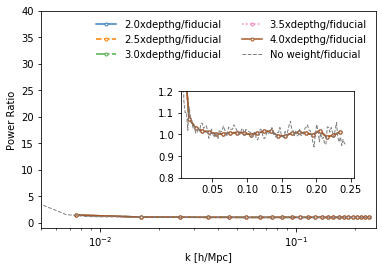

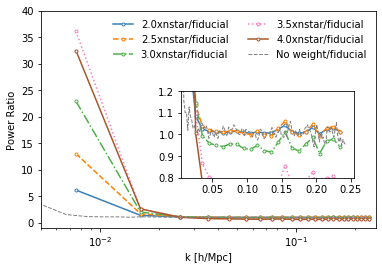

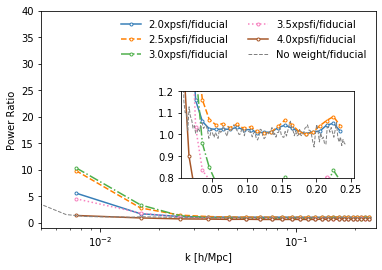

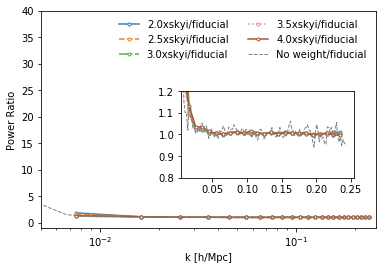

In [16]:
pp = PdfPages('syst_boosting.pdf')

for syst in ['ebv', 'depthg', 'nstar', 'psfi', 'skyi']:
    
    fg, ax = plt.subplots()
    ax1 = fg.add_axes([0.45, 0.3, 0.4, 0.3])

    for val in np.arange(2.0, 4.5, 0.5):
        ni = f'{val}x{syst}'
        pki = pks[ni]

        ax.plot(pki[0], pki[1]/pk0, marker='.', mfc='w', label=f'{ni}/fiducial')
        ax1.plot(pki[0], pki[1]/pk0, marker='.', mfc='w')

    ax.plot(k_, pk_n/pk_, color='grey', lw=1, label='No weight/fiducial')
    ax1.plot(k_, pk_n/pk_, color='grey', lw=1, label='No weight/fiducial')

    ax.set(xlim=(0.005, 0.255), ylim=(-1, 40.), xscale='log',
          xlabel='k [h/Mpc]', ylabel='Power Ratio')
    ax.legend(ncol=2, frameon=False)

    ax1.set(ylim=(0.8, 1.2), xlim=(0.005, 0.255))
    
    pp.savefig()
    
pp.close()
# plt.savefig('power_ratio.png', dpi=300, bbox_inches='tight')

In [4]:
import sys
sys.path.append('/home/mehdi/github/LSSutils/scripts/analysis')
from test_sysboost import TrainedModel

In [5]:
templates_path = '/home/mehdi/data/eboss/data/v7_2/3.0/NGC/512/main/ngal_eboss_main_512.fits'
metrics_path = '/home/mehdi/data/eboss/data/v7_2/3.0/NGC/512/main/nn_pnll_known/metrics.npz'
chck_path = '/home/mehdi/data/eboss/data/v7_2/3.0/NGC/512/main/nn_pnll_known'

tm = TrainedModel(templates_path, metrics_path)

In [6]:
dt_depth = tm.run(chck_path, 5, boost_factors=[(7, 2.0)])
dt_null = tm.run(chck_path, 5, boost_factors=[(7, 1.0)])

(237681, 17)
['/home/mehdi/data/eboss/data/v7_2/3.0/NGC/512/main/nn_pnll_known/model_0_1174702605/best.pth.tar', '/home/mehdi/data/eboss/data/v7_2/3.0/NGC/512/main/nn_pnll_known/model_0_1280952859/best.pth.tar'] 20 0
....................['/home/mehdi/data/eboss/data/v7_2/3.0/NGC/512/main/nn_pnll_known/model_1_1174702605/best.pth.tar', '/home/mehdi/data/eboss/data/v7_2/3.0/NGC/512/main/nn_pnll_known/model_1_1280952859/best.pth.tar'] 20 1
....................['/home/mehdi/data/eboss/data/v7_2/3.0/NGC/512/main/nn_pnll_known/model_2_1174702605/best.pth.tar', '/home/mehdi/data/eboss/data/v7_2/3.0/NGC/512/main/nn_pnll_known/model_2_1280952859/best.pth.tar'] 20 2
....................['/home/mehdi/data/eboss/data/v7_2/3.0/NGC/512/main/nn_pnll_known/model_3_1174702605/best.pth.tar', '/home/mehdi/data/eboss/data/v7_2/3.0/NGC/512/main/nn_pnll_known/model_3_1280952859/best.pth.tar'] 20 3
....................['/home/mehdi/data/eboss/data/v7_2/3.0/NGC/512/main/nn_pnll_known/model_4_1174702605/best.p

TypeError: cannot unpack non-iterable int object

In [7]:
dt_ebv = tm.run(chck_path, 5, boost_factors=[(1, 2.0)])

(237681, 17)
['/home/mehdi/data/eboss/data/v7_2/3.0/NGC/512/main/nn_pnll_known/model_0_1174702605/best.pth.tar', '/home/mehdi/data/eboss/data/v7_2/3.0/NGC/512/main/nn_pnll_known/model_0_1280952859/best.pth.tar'] 20 0
....................['/home/mehdi/data/eboss/data/v7_2/3.0/NGC/512/main/nn_pnll_known/model_1_1174702605/best.pth.tar', '/home/mehdi/data/eboss/data/v7_2/3.0/NGC/512/main/nn_pnll_known/model_1_1280952859/best.pth.tar'] 20 1
....................['/home/mehdi/data/eboss/data/v7_2/3.0/NGC/512/main/nn_pnll_known/model_2_1174702605/best.pth.tar', '/home/mehdi/data/eboss/data/v7_2/3.0/NGC/512/main/nn_pnll_known/model_2_1280952859/best.pth.tar'] 20 2
....................['/home/mehdi/data/eboss/data/v7_2/3.0/NGC/512/main/nn_pnll_known/model_3_1174702605/best.pth.tar', '/home/mehdi/data/eboss/data/v7_2/3.0/NGC/512/main/nn_pnll_known/model_3_1280952859/best.pth.tar'] 20 3
....................['/home/mehdi/data/eboss/data/v7_2/3.0/NGC/512/main/nn_pnll_known/model_4_1174702605/best.p

In [8]:
def tohp(dt):
    """ to HEALPix """
    npred = np.zeros(12*512*512)
    npred[:] = np.nan
    npred[dt['hpix']] = dt['weight'].mean(axis=1)
    return npred

In [12]:
dt_null['weight'].shape

(237681, 100)

In [14]:
%matplotlib inline

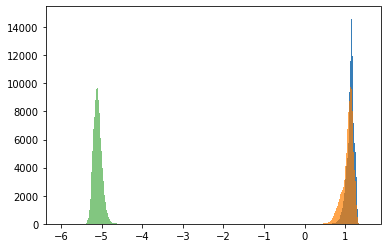

In [26]:
plt.hist(dt_null['weight'].mean(axis=1), bins=np.arange(-6., 1.5, 0.01))
plt.hist(dt_ebv['weight'].mean(axis=1), bins=np.arange(-6., 1.5, 0.01), alpha=0.7, )
_ = plt.hist(dt_depth['weight'].mean(axis=1), bins=np.arange(-6.0, 1.5, 0.01), alpha=0.7, )

In [25]:
np.percentile(dt_depth['weight'].mean(axis=1), [0, 100])

array([-5.56516981, -4.03482819])

In [ ]:
from lssutils.utils import EbossCat

In [6]:
# read data, randoms, and prepare mappers
dat = EbossCat('/home/mehdi/data/eboss/data/v7_2/eBOSS_QSO_full_NGC_v7_2.dat.fits', zmin=0.8, zmax=3.5)
ran = EbossCat('/home/mehdi/data/eboss/data/v7_2/eBOSS_QSO_full_NGC_v7_2.ran.fits', kind='randoms', zmin=0.8, zmax=3.5)

[ 000008.94 ]   0: 04-27 12:20  EbossCat        INFO     0.8 < z < 3.5
[ 000008.94 ]   0: 04-27 12:20  EbossCat        INFO     COMP_BOSS > 0.5
[ 000008.95 ]   0: 04-27 12:20  EbossCat        INFO     sector_SSR > 0.5
[ 000008.95 ]   0: 04-27 12:20  EbossCat        INFO     IMATCH = 1 or 2 for data
[ 000008.95 ]   0: 04-27 12:20  EbossCat        INFO     264888 (65.9%) data pass the cuts
[ 000009.65 ]   0: 04-27 12:20  EbossCat        WARNING  column QSO_ID not in the randoms file
[ 000009.65 ]   0: 04-27 12:20  EbossCat        WARNING  column IMATCH not in the randoms file
[ 000011.30 ]   0: 04-27 12:20  EbossCat        INFO     0.8 < z < 3.5
[ 000011.37 ]   0: 04-27 12:20  EbossCat        INFO     COMP_BOSS > 0.5
[ 000011.40 ]   0: 04-27 12:20  EbossCat        INFO     sector_SSR > 0.5
[ 000011.47 ]   0: 04-27 12:20  EbossCat        INFO     13475376 (78.2%) randoms pass the cuts


In [7]:
for bf in [1., 2., 3., 4., 5.]:
    
    dt_0 = tm.run(chck_path, 5, boost_factors=[(1, bf)])

    nnwmap = {'main':(z_bins['main'], NNWeight(dt_0, 512))}
    dat.swap(nnwmap)
    ran.reassign_zattrs(dat)

    p = '/home/mehdi/data/eboss/data/v7_2/3.0/catalogs_boosting/'
    dat_name = f'{p}eBOSS_QSO_known_ebv_{bf:.0f}_NGC_v7_2.dat.fits'
    print(dat_name)    
    ran_name = dat_name.replace('.dat.', '.ran.')

    dat.to_fits(dat_name)
    ran.to_fits(ran_name)    

(237681, 17)
['/home/mehdi/data/eboss/data/v7_2/3.0/NGC/512/main/nn_pnll_known/model_0_1174702605/best.pth.tar', '/home/mehdi/data/eboss/data/v7_2/3.0/NGC/512/main/nn_pnll_known/model_0_1280952859/best.pth.tar'] 20 0
.....

KeyboardInterrupt: 

In [19]:
pk_null = run_ConvolvedFFTPower(dat_name, ran_name, out_name, 
                                zmin=0.8, zmax=2.2, boxsize=6600., return_pk=True, poles=[0])

[ 001238.00 ]   0: 04-27 12:06  CatalogSource   INFO     Extra arguments to FileType: () {}
[ 001238.00 ]   0: 04-27 12:06  CatalogSource   INFO     Extra arguments to FileType: () {}
[ 001364.03 ]   0: 04-27 12:08  FKPCatalog      INFO     cartesian coordinate range: [-3303.4042076  -3219.06508086   537.67938743] : [-193.46327403 3298.89667491 3277.66976154]
[ 001364.03 ]   0: 04-27 12:08  FKPCatalog      INFO     BoxSize = [6600. 6600. 6600.]
[ 001364.03 ]   0: 04-27 12:08  FKPCatalog      INFO     BoxCenter = [-1748.43374081    39.91579703  1907.67457448]
[ 001364.04 ]   0: 04-27 12:08  ConvolvedFFTPower INFO     using compensation function CompensateTSC for source 'first'
[ 001364.04 ]   0: 04-27 12:08  ConvolvedFFTPower INFO     using compensation function CompensateTSC for source 'second'
[ 001394.40 ]   0: 04-27 12:09  CatalogMesh     INFO     Chunk 0 ~ 4194304 / 218209 
[ 001395.39 ]   0: 04-27 12:09  CatalogMesh     INFO     painted 218209 out of 218209 objects to mesh
[ 00142

In [20]:
pk_now = nb.ConvolvedFFTPower.load('/home/mehdi/data/eboss/data/v7_2/3.0/measurements/spectra/spectra_NGC_noweight_mainhighz_512_v7_2_main.json')
pk_old = nb.ConvolvedFFTPower.load('/home/mehdi/data/eboss/data/v7_2/3.0/measurements/spectra/spectra_NGC_known_mainhighz_512_v7_2_main.json')

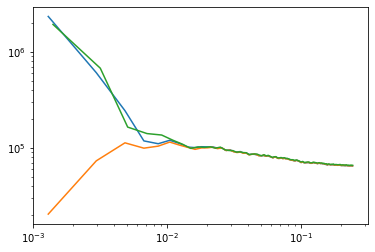

In [23]:
for pk_i in [pk_now, pk_old, pk_null]:
    plt.loglog(pk_i.poles['k'], pk_i.poles['power_0'].real)
    

In [5]:
dt_1 = tm.run(chck_path, 1, boost_factors=[(1, 2.0)], )

(237681, 17)
['/home/mehdi/data/eboss/data/v7_2/3.0/NGC/512/main/nn_pnll_known/model_0_1174702605/best.pth.tar', '/home/mehdi/data/eboss/data/v7_2/3.0/NGC/512/main/nn_pnll_known/model_0_1280952859/best.pth.tar'] 20 0
.

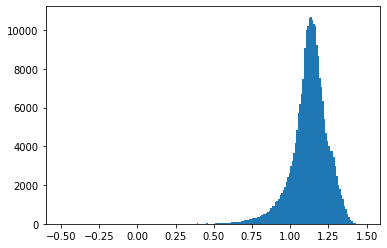

In [26]:
_=plt.hist(dt_0['weight'], bins=np.arange(-0.5, 1.5, 0.01))
# _=plt.hist(dt_1['weight'], alpha=0.7, bins=np.arange(-0.5, 1.5, 0.01.))

In [27]:
hp_0 = tohp(dt_0)
# hp_1 = tohp(dt_1)

/home/mehdi/miniconda3/envs/sysnet/lib/python3.8/site-packages/healpy/pixelfunc.py:345: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/home/mehdi/miniconda3/envs/sysnet/lib/python3.8/site-packages/healpy/projaxes.py:1184: RuntimeWarning: invalid value encountered in less
  result.data[result.data < 0] = 0.0
/home/mehdi/miniconda3/envs/sysnet/lib/python3.8/site-packages/healpy/projaxes.py:1185: RuntimeWarning: invalid value encountered in greater
  result.data[result.data > 1] = 1.0


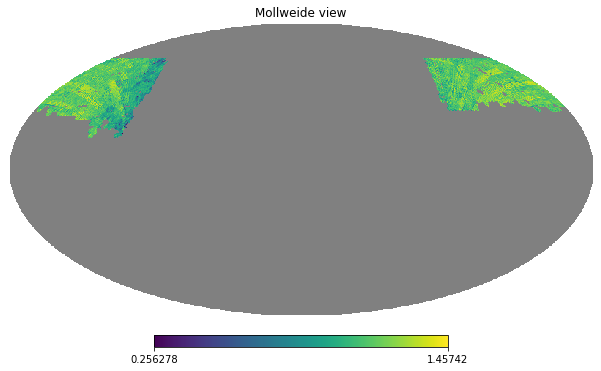

In [28]:
hp.mollview(hp_0)